In [1]:
import pandas as pd
df=pd.read_csv("D:/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['sex']=l.fit_transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
inputs= ['Pclass','Sex','Age','Fare']
target=df['Survived']
target


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:

inputs=df.drop(['Sex','PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived'],axis='columns')
inputs=inputs.fillna(inputs.Age.mean())
i=['Pclass','Age','Fare','sex']
inputs

,Pclass,Age,Fare,sex
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [5]:

from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs,target)

DecisionTreeClassifier()

In [6]:
model.score(inputs,target)

0.9797979797979798

In [7]:
model.predict([[3,36,23.5,0]])

array([0], dtype=int64)

[Text(109.13492458371351, 213.0912, 'sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(52.48432937956205, 204.3936, 'Pclass <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(20.16131386861314, 195.696, 'Age <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(13.44087591240876, 186.9984, 'Pclass <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(10.997080291970804, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(15.884671532846715, 178.3008, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(26.88175182481752, 186.9984, 'Fare <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(20.772262773722627, 178.3008, 'Fare <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(18.328467153284674, 169.60320000000002, 'Age <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(13.44087591240876, 160.9056, 'Age <= 23.5\ngini = 0.14\nsamples = 66\nvalue = [5, 61]'),
 Text(10.997080291970804, 152.208, 'gini = 0.0\n

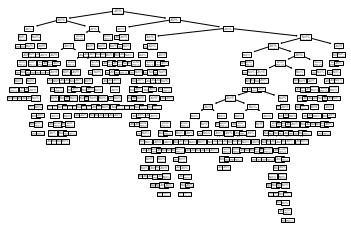

In [10]:
tree.plot_tree(model,feature_names=i)